# Computer Lab: Quantile Regression

### Adriano Del Gallo & Alexandre Lanvin

### 1. Data

In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.io import loadmat


def load_data(filename='census_data.mat', test_size=0.33):
    data = loadmat(filename)
    X = data.get('A')  # Educational Attainment
    X = np.asarray(X, dtype='float64')
    # Variables
#    Sex
#    Age in 30 40
#    Age in 40 50
#    Age in 50 60
#    Age in 60 70
#    Age gte 70
#    Non white
#    Unmarried
#    Education
#    Education code squared
    # Education
    #00 Not in universe (Under 3 years)
    #01 No schooling completed
    #02 Nursery school to 4th grade
    #03 5th grade or 6th grade
    #04 7th grade or 8th grade
    #05 9th grade
    #06 10th grade
    #07 11th grade
    #08 12th grade, no diploma
    #09 High school graduate
    #10 Some college, but less than 1 year
    #11 One or more years of college, no degree
    #12 Associate degree
    #13 Bachelorâ€™s degree
    #14 Masterâ€™s degree
    #15 Professional degree
    #16 Doctorate degree
    y = data.get('b')[:, 0].reshape(-1, 1)
    del data
    ind = np.nonzero(y == 0.)[0]  # remove samples with no income
    X = np.delete(X, ind, axis=0)
    y = np.delete(y, ind, axis=0)
    X = np.delete(X, 1, axis=1)  # this variable is just ones everywhere

    scaler_x = StandardScaler()
    scaler_y = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=test_size, random_state=0)
    X_train = scaler_x.fit_transform(X_train)
    y_train = scaler_y.fit_transform(y_train)
    X_test = scaler_x.transform(X_test)
    y_test = scaler_y.transform(y_test)

    return X_train, X_test, y_train, y_test

###  2. Quantile regression with linear kernels

#### Question 2.1

* Let us calculate $L^*_{\tau}$, the Fenchel-Legendre conjugate of $L_{\tau}$.  

By definition: $\forall \phi \in \mathbb{R}, $ 

$\begin{equation}
\begin{aligned}
L^*_{\tau}(\phi) &= \underset{x \in \mathbb{R}}{\mathrm{sup}}(<\phi,x> - \,L_{\tau}(x))\\
& = \underset{x \in \mathbb{R}}{\mathrm{sup}}(\phi x -\mathrm{max}(-(1-\tau)x, \tau x)) \\
& = \underset{x \in \mathbb{R}}{\mathrm{sup}} \,\mathrm{min} \,((1-\tau + \phi)x, \,(\phi -\tau) x)
\end{aligned}
\end{equation}$  

If $1-\tau + \phi$ and $ \phi -\tau$ are of the same sign, then $L^* = +\infty$. Since $\tau$ is in $(0,1)$, the only possible case where $L^*$ is finite is when $1-\tau + \phi > 0$ and $ \phi -\tau < 0$, i.e. when $\phi \in [\tau - 1,\, \tau]$ in which case $L^* = 0$. 

Finally $L^* = \iota_{[\tau - 1,\, \tau]}$ and $(\gamma L)^* = \iota_{[\gamma(\tau - 1),\, \gamma\tau]}$

* Let us calculate the proximal of $L^*$

$\begin{equation}
\begin{aligned}
\mathrm{prox}_{\gamma\,L^*}(v) &=  \underset{x \in \mathbb{R}}{\mathrm{argmin}} \, \iota_{[\gamma(\tau - 1),\, \gamma\tau]}(x) + \frac{1}{2\gamma}||v-x||^2\\
& = \underset{x \in [\gamma(\tau - 1),\, \gamma\tau]}{\mathrm{argmin}} ||v-x||^2
\end{aligned}
\end{equation}$ 

$\mathrm{prox}_{\gamma L^*}(v)$ is the projection of $v$ on $d_\tau = [\gamma(\tau - 1),\, \gamma\tau] $

* Finaly we can can compute $\mathrm{prox}_{\gamma L}$

Using Moreau's identity we gat that :

$\begin{equation}
\begin{aligned}
\mathrm{prox}_{\gamma\,L}(v) &= v  - \mathrm{prox}_{\gamma L^*}(v) \\\\
prox_{\gamma L_\tau}(v) &= 
{\left\{
    \begin{array}{ll}
       v-\gamma\tau \,\:\:\:\: \; \; \; \; \; \;  \text{if} \;\gamma\tau < v   \\
       0    \;\;\;\;\; \; \; \; \; \; \; \; \;  \; \; \; \; \text{if} \, v\in d_\tau \\
       v + \gamma(\tau-1) \,\: \; \text{if}\; v < \gamma (\tau-1) \\
    \end{array}
\right.}
\end{aligned}
\end{equation}$



#### Question 2.2

Let $(w, w_0) \in \mathbb{R}^2$, $\gamma > 0$.  
Let's calculate $prox_{\gamma g}((w,w_0))$

$\begin{equation}
\begin{aligned}
prox_{\gamma g}((w,w_0)) &= \underset{(y,y0)\in \mathbb{R}^2}{\mathrm{argmin}}\, \gamma g((y,y_0)) + \frac{1}{2} ||(y,y_0) - (w,w_0)||^2 \\
&= \underset{(y,y0)\in \mathbb{R}^2}{\mathrm{argmin}}\, \frac{\gamma \alpha}{2}||y||^2 + \frac{1}{2} ||(y -w ,y_0- w_0)||^2 \\
\end{aligned}
\end{equation}$

Let's consider the function $\Phi_{w,w_0} : (y,y_0) \longmapsto \frac{\gamma \alpha}{2}||(y,y_0)||^2 + \frac{1}{2} ||(y -w ,y_0- w_0)||^2$  
$\Phi_{w,w_0}$ is differentiable and convex on $\mathbb{R}^2$.  
Let $(y, y_0) \in \mathbb{R}^2$.

$\nabla\Phi_{w,w_0}(y,y_0) = 0$ i.i.f. 
$\left\{\begin{align}
\alpha \gamma y + y-w= 0\\
y_0 - w_0 =0
\end{align}\right.$  
i.e. i.i.f. $\left\{
\begin{equation}
\begin{aligned}
y &= \frac{1}{1 + \gamma \alpha}w\\
y_0 &=w_0
\end{aligned}
\end{equation}\right.$

Therefore, $\Phi_{w,w_0}$ admits a minimum in $\left(\frac{1}{1 + \gamma \alpha}w,w_0\right)$, and:
$$\boxed{prox_{\gamma g}((w,w_0)) = \left(\frac{w}{1 + \gamma \alpha},w_0\right)}$$

#### Question 2.3

* First equality :  

$\underset{w \in \mathbb{R}^d, w_0 \in \mathbb{R}}{\mathrm{min}}\frac{\alpha}{2}||w||^2 - L_\tau(y-xw -w_0e)$ is the primal value to the problem. Since there are feasable points, the primal value being attained is equivilant to the existence of a saddle point to the Lagrangian. 

Thus : 


$\begin{equation}
\begin{aligned}
\underset{w \in \mathbb{R}^d, w_0 \in \mathbb{R}}{\mathrm{min}}\frac{\alpha}{2}||w||^2 - L_\tau(y-xw -w_0e)
&= \underset{w \in \mathbb{R}^d, w_0 \in \mathbb{R}}{\mathrm{min}}\underset{z \in \mathbb{R}^n}{\mathrm{max}}\, \mathcal{L}((w,w_0),z)\\
&= \underset{w \in \mathbb{R}^d, w_0 \in \mathbb{R}}{\mathrm{min}}\underset{z \in \mathbb{R}^n}{\mathrm{max}} \frac{\alpha}{2}||w||^2 - L_\tau^*(z) + z^T(y-xw -w_0e)
\end{aligned}
\end{equation}$ 

* Second equality: 

Since we are at a saddle point of the Lagrangian, we can permute $\mathrm{max}$ and $\mathrm{min}$. Minimising according to $w$ with fixed $z$ leads to the equation $z^Tx + \alpha w^T = 0$ which solves into $w = -\frac{x^Tz}{\alpha}$. 

Minimising according to $w_0$ gives the condition $e^Tz = 0$ which we can write as $\iota_{\{0\}}e^Tz$ in the Lagrangian. When injecting the value of w into the lagrangian, we get the second equality by noticing that 
$z^Txw = -\frac{1}{\alpha}||x^Tz||^2$


* Last equality :

$\begin{equation}
\begin{aligned}
&\underset{z \in \mathbb{R}^n}{\mathrm{max}}\,\underset{u \in \mathbb{R}}{\mathrm{min}}\, y^Tz - \frac{1}{2\alpha}||x^Tz||^2 - L_\tau^*(z) - ue^Tz
&=\underset{z \in \mathbb{R}^n}{\mathrm{max}}\, y^Tz - \frac{1}{2\alpha}||x^Tz||^2 - L_\tau^*(z) - \underset{u \in \mathbb{R}}{\mathrm{max}}\,ue^Tz\\
&= \underset{z \in \mathbb{R}^n}{\mathrm{max}}\, y^Tz - \frac{1}{2\alpha}||x^Tz||^2 - L_\tau^*(z) - \iota_{\left\{0\right\}}(e^Tz)
\end{aligned}
\end{equation}$  
as when $e^Tz = 0$, then : $\forall u \in \mathbb{R}, ue^Tz=0$, and else: $ue^Tz \underset{u \to \mathrm{sgn}(e^Tz)\infty}{\longrightarrow} +\infty$ (the limit is well defined).

* Finally:
$$\boxed{
\begin{equation}
\begin{aligned}
\underset{w \in \mathbb{R}^d, w_0 \in \mathbb{R}}{\mathrm{min}} \frac{\alpha}{2}||w||^2 + L_\tau(y-xw -w_0e)
&=  \underset{w \in \mathbb{R}^d, w_0 \in \mathbb{R}}{\mathrm{min}}\underset{z \in \mathbb{R}^n}{\mathrm{max}} \frac{\alpha}{2}||w||^2 - L_\tau^*(z) + z^T(y-xw -w_0e)\\
&= \underset{z \in \mathbb{R}^n}{\mathrm{max}}\, y^Tz - \frac{1}{2\alpha}||x^Tz||^2 - L_\tau^*(z) - \iota_{\left\{0\right\}}(e^Tz)\\
&= \underset{z \in \mathbb{R}^n}{\mathrm{max}}\,\underset{u \in \mathbb{R}}{\mathrm{min}}\, y^Tz - \frac{1}{2\alpha}||x^Tz||^2 - L_\tau^*(z) - ue^Tz
\end{aligned}
\end{equation}
}$$

### 3. Implementation

##### ADMM

We set 
$ f(w,w_0) = \frac{\alpha}{2}||w||^2$
$ g(z) = h(M(w,w_0)) =  \sum_{i=1}^n (L_{\tau}(y_{i} - M(w,w_0)_{i}))$
$\,\text{ with } h(v) = L_\tau(y-v) \text{ and } M(w,w_0) = Xw + w_0e^T = (X \; | e^T)\begin{pmatrix} w\\w_0 \end{pmatrix}$

Which gives us the following iterations for the ADMM algorithm:


$$
\left\{
    \begin{array}{ll}
        (w,w_0)^{k+1} \in \arg\!\min_{(w,w_0)} f((w,w_0)) + <\lambda^k,M(w,w_0)> + \frac{1}{2\gamma}||M(w,w_0)-z^k||^2 \\
        z^{k+1} = \arg\!\min_z g(z) - <\lambda^k,z> + \frac{1}{2\gamma}||Mx^{k+1}-z||^2\\
        \lambda^{k+1} = \lambda^k + \frac{1}{\gamma}(Mx^{k+1} - z^{k+1}) \\
    \end{array}
\right.
$$

Let's compute these quantities explicitly: 


1.
$f$ is differentiable so by the first order optimum conditions can be written

$\begin{equation}
\begin{aligned}
&\alpha w + M^T (\lambda^k -  \frac{1}{\gamma} z^k) + \frac{1}{\gamma}M^T M(w,w_0) = 0 \\
\iff& \bigg[ \alpha \begin{pmatrix} I_d & 0 \\ 0 & 0 \end{pmatrix} + \frac{1}{\gamma}M^T M \bigg] \,\begin{pmatrix} w\\w_0 \end{pmatrix} = M^T (\frac{1}{\gamma}z^k - \lambda^k ) \\
\iff&  \begin{pmatrix} w\\w_0 \end{pmatrix} = \bigg[ \alpha \begin{pmatrix} I_d & 0 \\ 0 & 0 \end{pmatrix} + \frac{1}{\gamma}M^T M \bigg]^{-1} M^T (\frac{1}{\gamma}z^k - \lambda^k ) \\
\end{aligned}
\end{equation}$


2.
We compute $z^k$ by fermat's rule: 

$ 
\begin{align}
0 \in \partial \gamma L_\tau(y - z) - \gamma\lambda^k +  (z - (Mx^{k+1})) ) 
& \iff \gamma\lambda^k+ (Mx^{k+1}) \in \partial \gamma L_\tau(y - z) + z \\
& \iff  z^{k+1} = \mathrm{prox}_{\gamma h}(\gamma\lambda^k + (Mx^{k+1})) \\
\end{align}
$


We need to compute $\mathrm{prox}_{\gamma h}$ 

For $y\in \mathbb{R}$,
\begin{align}
\\prox_{\gamma h}(v) 
& = \arg\min_x [\gamma L_\tau(y-x) +\frac{1}{2}||x-v||^2_2]\\
& = \arg\min_x [\gamma \max\{-(1-\tau)(y-x),\tau(y-x)\} +\frac{1}{2}||x-v||^2_2]
\end{align}

If $y<x$ :

$prox_{\gamma h}(v) = \arg\min_x [\gamma\tau(y-x)  +\frac{1}{2}(x-v)^2]$

Which gives us by the first order optimal conditions : 

$x= v+\gamma\tau$

If $y>x$ : 
$ prox_{\gamma h}(v) = \arg\min_x [\gamma(\tau-1)(y-x)  +\frac{1}{2}(x-v)^2]$

Which gives :

$x= v-\gamma (1-\tau)$

Finally,  
$prox_{\gamma h}(v) = 
\left\{
    \begin{array}{ll}
       v - \gamma(1-\tau) \; \;  \text{if} : y+\gamma(1-\tau)< v \\
       y \; \; \; \; \; \; \; \; \; \;\;\;\;\;\;\;\; \text{if } v \in [y-\gamma \tau, y+\gamma(1-\tau)]\\
       v+\gamma \tau \;\;\;\;\;\;\; \; \; \;  \text{if} : y-\gamma \tau>v   
    \end{array}
\right.
$}

In [0]:
census_data = load_data(test_size = 0.33)

In [0]:
X_train, X_test, y_train, y_test = census_data

In [0]:
def prox_h(v,y,gamma,tau):
    if (y > v + gamma * tau):
        return(v + gamma * tau)
    if(y < v - gamma*(1-tau)):
        return(v-gamma*(1-tau))
    return y

def L_tau(v, tau):
    return max(-(1. -tau)*v, tau*v)

def ADMM(X, y, n_iter=20, alpha=1, tau=0.1, gamma=1):
    x = [[0.]]*(len(X[1])+1)
    z = [[0.]]*(len(X))
    Y = y
    lambd = z
    err_list = []
    L_list = []
    
    e = [1]*len(X_train)
    M = np.column_stack((e,X_train))
    I = np.identity(len(M[0]))
    I[0][0] = 0 
    A = np.linalg.inv(alpha * I + (np.dot(M.T, M)) / gamma)
    A = np.dot(A, M.T)
    
    for i in range(n_iter):

        x = np.dot(A,np.subtract(z,lambd))
        V = np.dot(M,x)+gamma*lambd
        for j in range(len(z)):
            z[j] = prox_h(V[j],Y[j],gamma,tau)
        lambd +=(np.dot(M,x)-z)
    
        L = 0
        for j in range (len(X)):
            mu = 0
            for k in range(len(X[0])):
                mu += X[j,k]*x[k+1]
            mu += x[0]
            L += L_tau(Y[j][0] - mu[0], tau)
        L_list.append(L)
        
    w = x[1:]
    w0 = x[0]
    
    return(w, w0, L_list)
  

In [0]:
w, w0, L_list = ADMM(X_train, y_train)

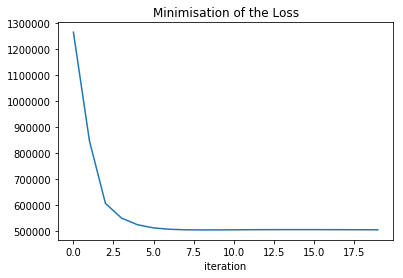

In [0]:
import matplotlib.pyplot as plt
plt.plot(L_list)
plt.title('Minimisation of the Loss')
plt.xlabel('iteration')
plt.show()

##### Vu-Condat

One can use $\underset{z \in \mathbb{R}^n}{\mathrm{max}}\, y^Tz - \frac{1}{2\alpha}||x^Tz||^2 - L_\tau^*(z) - \iota_{\left\{0\right\}}(e^Tz)$ to compute our infimum (see question 2.3).  

$\underset{z \in \mathbb{R}^n}{\mathrm{max}}\, y^Tz - \frac{1}{2\alpha}||x^Tz||^2 - L_\tau^*(z) - \iota_{\left\{0\right\}}(e^Tz) = - \,\underset{z \in \mathbb{R}^n}{\mathrm{min}}\, -y^Tz + \frac{1}{2\alpha}||x^Tz||^2 + L_\tau^*(z) + \iota_{\left\{0\right\}}(e^Tz)$

In this way, it is possible to apply the Vu-Condat algorithm for our goal with $M = e^T, f :z \longmapsto \frac{1}{2} \left \| x^T z\right \|^2 -y^T z, g=L^*_\tau, h = \iota_0$.  
Indeed, $g,h \in \Gamma_0(\mathbb{R})$ and $f$ is convex and differentiable (by theorem of operations and because the $L^2$ norm is).  
One step from the state $k$ to the $k+1$ one may be written as follows (with notations from the course):  

$$\left\{
    \begin{array}{ll}
        z^{k+1} = \underset{v \in \mathcal{Y}}{\operatorname{argmin}} h(v) \,- <v, \Phi^k> + \frac{1}{2\gamma}\left \| v-Mx^k \right \|^2 \\
       \Phi^{k+1}=\Phi^k+\gamma^{-1}(Mz^k-x^{k+1}) \\
       x^{k+1} = \underset{w \in \mathcal{X}}{\operatorname{argmin}} g(w)\,+<w, \triangledown f(x^k)> +<w, M^*(2\Phi^{k+1}-\Phi^k)> + \frac{1}{2\tau}\left \| w-x^k\right \|^2\\
    \end{array}
\right.
$$  

In our precise case, as $h = \iota_0$, $h(v) \,- <v, \Phi^k> + \frac{1}{2\gamma}\left \| v-Mx^k \right \|^2 = \left\{\begin{array}{ll}0\,\,\mathrm{if}\,v = 0\\+\infty \, \mathrm{otherwise}\end{array}
\right.$.  
In this way, for all k in $\mathbb{N}$, $\underset{v \in \mathcal{Y}}{\operatorname{argmin}} h(v) \,- <v, \Phi^k> + \frac{1}{2\gamma}\left \| v-Mx^k \right \|^2$ thus for all k in $\mathbb{N}^*, $ $z^k = 0$.

Therefore, the step may be re-written in the following way :


$$\left\{
    \begin{array}{ll}
       \Phi^{k+1}=\Phi^k-\gamma^{-1}x^{k+1} \\
       x^{k+1} = \underset{w \in \mathcal{X}}{\operatorname{argmin}} g(w)\,+<w, \triangledown f(x^k)> +<w, M^*(2\Phi^{k+1}-\Phi^k)> + \frac{1}{2\tau}\left \| w-x^k\right \|^2\\
    \end{array}
\right.
$$  

Moreover, for all k,  
$\begin{align}
x^{k+1} &= \underset{w \in \mathcal{X}}{\operatorname{argmin}} g(w)\,+<w, \triangledown f(x^k) + M^*(2\Phi^{k+1}-\Phi^k)> + \frac{1}{2\tau}\left \| w-x^k\right \|^2 \\
& = \underset{w \in \mathcal{X}}{\operatorname{argmin}} g(w)\,+<w - x^k, \triangledown f(x^k) + M^*(2\Phi^{k+1}-\Phi^k)> + \frac{1}{2\tau}\left \| w-x^k\right \|^2
\end{align}
$  
as $<x^k, \triangledown f(x^k) + M^*(2\Phi^{k+1}-\Phi^k)>$ does not depend on $w$.  
Thus,  
$\begin{align}
x^{k+1}
& = g(w) + \underset{w \in \mathcal{X}}{\operatorname{argmin}}\left \| w-\triangledown f(x^k)+M(2\Phi^{k+1}-\Phi^k) \right \|^2 \\
& = \, prox_{\tau L^*_\tau}(\triangledown f(x^k) - M(2\Phi^{k+1}-\Phi^k))
\end{align}$  
in our precise case.

Finaly, the step could be described in this way for all k:
$$\boxed{\left\{
    \begin{array}{ll}
       \Phi^{k+1}=\Phi^k-\gamma^{-1}x^{k+1} \\
       x^{k+1} = \, prox_{\tau L^*_\tau}(\triangledown f(x^k) - M(2\Phi^{k+1}-\Phi^k))\\
    \end{array}
\right.}
$$  

In [0]:
census_data = load_data(test_size = 0.999)

X_train, X_test, y_train, y_test = census_data

In [0]:
def f(z, alpha, args = (X_train, y_train)):
    return float(np.linalg.norm(args[0].T @ z)**2/(2*alpha) - args[1].T @ z)

def grad_f(z, alpha, X, y):
    return X @ X.T @ z - y

def prox_L_tau_star(z, tau):
    return np.array([(z[i] > tau)*tau + (z[i] < tau - 1)*(tau - 1) for i in range(len(z))])

In [0]:
def vu_condat(X, y, f, grad_f, prox_g, M, n_iter, alpha = 1., tau = 0.7, gamma = 1.):
    """Vũ-Condat method, implemented in our case
    -------------------------------------------------------
    Inputs :
        - X, y : dataset
        - f: a convex differentiable function
        - grad_f : the gradient of f (supposed to be Lipschitz)
        - prox_g : proximity operator of g
        - M : linear operator
        - n_iter : number of iterations
        - alpha, tau, gamma : constants
    -------------------------------------------------------
    Outputs : the infimum  
    """
    
    # Initialization
    phi = 1
    x = np.zeros(y.shape)
    evolution = []
    
    # Steps
    for k in range(n_iter):
        previous_phi = phi
        phi += M.T @ x /gamma
        x = prox_g(x - tau*(grad_f(x, alpha, X, y) + M @ (2*phi - previous_phi)) , tau)
        evolution.append(f(x, alpha, args = (X, y)))

    return f(x, alpha, args = (X, y)), evolution

In [0]:
infimum, evolution = vu_condat(X_train, y_train, f= f, grad_f = grad_f, prox_g = prox_L_tau_star,M = np.ones(y_train.shape), n_iter = 15, tau = 0.7)

Text(0.5, 1.0, 'Evolution for the Vu condat algorithm')

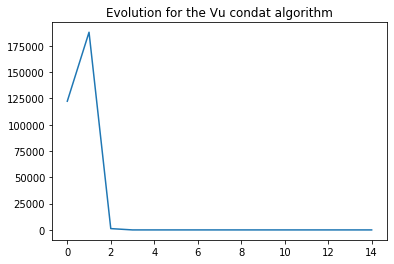

In [24]:
import matplotlib.pyplot as plt
plt.plot(evolution)
plt.title("Evolution for the Vu condat algorithm")

#### Question 3.2

The stopping criterion we could use is to stop the algorithm when the difference between two steps in the update becomes smaller than an $\epsilon > 0$ that we can define. We chose this because if the updates are smaller than $\epsilon$ then we have reached a local minimum. One could also check the difference between the loss at every step. In practice however, we use a fixed number of iterations for computational reasons.

#### Question 3.3

Due to memory problems and computational time we were not able to try with the full dataset. However we see on the examples that our algorithms seem to converge properly